# 0.Project 2 / Rule

1) 데이터 선정 이유 및 문제 정의
데이터를 선정할 때에는 반드시 왜 해당 데이터를 선택했는지에 대해 이혜람님의 이유를 자세히 설명해주셔야 합니다. 
데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정합니다.
#회귀 분류처럼 이진법으로 노노 회귀는 보통 연속적인 숫자, 즉 예측값이 float 형태인 문제들을 해결하는데 사용된다.


2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택
데이터를 선정함과 동시에 데이터를 통해서 내가 무엇을 해볼 수 있을지 가설을 세우는 것이 중요합니다.
가설은 쓸모 있어야 한다는 사실을 잊지마시길 바랍니다.데이터 기반의 사고방식, data-driven의 마음가짐을 section1과 2에서 배웠습니다. 이번에는 그것들을 심화시켜서 문제 해결을 시도 해봅니다.
#velog에 씀 

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.
해당 특성을 target으로 지정한 이유를 설명하세요.
#DASS Guide에 나온 score 이용 (의학) 

해당 베이스라인 모델과 평가지표를 선택한 이유를 설명하세요

3) EDA와 데이터 전처리
가설을 정했고 베이스라인을 만들었다면 데이터의 탐색 및 가공을 시작해봅니다. 
데이터 전처리를 통해 할 수 있는 것은 다양하지만 다음을 시도해볼 수 있습니다.

EDA

Feature Engineering

데이터의 정규화

노이즈 제거

결측치 제거 혹은 대체

데이터 밸런스

그 외

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다
Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?

이혜람님이 만들고자 하는 모델은 언제 유용한가요? 어떤 한계를 가지고 있나요?

4) 머신러닝 방식 적용 및 교차검증
데이터의 탐색과 전처리 작업이 끝났다면 모델링을 통해 베이스라인과의 성능 비교를 해봅니다.

Linear / Tree-based / Ensemble 모델을 학습하세요. (다양하게 시도해보시는 걸 추천합니다.)

평가지표를 계산 후 베이스라인과 비교해보세요.

어느정도 성능이 나왔다면, 교차 검증 (이하 CV)을 통해서 일반화될 가능성이 있는지 확인해봅니다.

모델 성능을 개선하기 위한 다양한 방법을 적용해보세요.

Hyperparameter tuning, etc.
최소 2개 이상의 모델을 만들어서 validation 점수를 보고하세요.

최종 모델의 test 점수를 보고하세요.

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.
모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
최종 모델에 관해 설명하세요.

5) 머신러닝 모델 해석
프로젝트에서 가장 중요하다고 볼 수 있는 부분 입니다. 우리는 SHAP, PDP 등을 통해서 모델이 관측치를 어떤 특성을 활용했거나, 어떤 특성이 타겟에 영향을 끼쳤는지 등을 해석하는 방법에 대해서 배웠습니다.
여러분의 프로젝트에도 이러한 해석 방법을 활용해 머신러닝 모델을 비전문가라도 조금 더 쉽게 이해하고 접근할 수 있도록 해주셔야 합니다.

PDP, SHAP을 활용하여 최종 모델을 설명합니다
시각화는 "설명"이 제일 중요합니다.
태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.
모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?
어떤 특성이 있다면 모델의 예측에 도움이 될까요? 해당 특성은 어떻게 구할 수 있을까요?




가설 
TIPI 2,4,6,8,10 문항 점수가 높을수록 DASS 진단이 높게 나올 것이다 



# 1. 데이터 이해

# 1.1 Data load

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
df = pd.read_csv('../input/depression-anxiety-stress-scales/DASS_data_21.02.19/data.csv', error_bad_lines = False, warn_bad_lines = False, sep=r'	')
codebook = open('../input/depression-anxiety-stress-scales/DASS_data_21.02.19/codebook.txt', 'r').read()



In [ ]:
import os
import time
import shap
import random
import xgboost
import numpy as np
import pandas as pd
from umap import UMAP
import networkx as nx
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import roc_curve, precision_recall_curve

import warnings; warnings.filterwarnings("ignore")

df


# 1.2 Null Check

In [ ]:
df.isnull().sum()

# 1.3 describe

In [ ]:
df.describe()

In [ ]:
df.describe().T.style.background_gradient(cmap = 'Greens')
#A=평가,E=점수 메기는데에 걸린 시간, I=질문의 위치 (순서) 
#This response is stored in variable A (e.g. Q1A). 
#Also recorded was the time taken in milliseconds to answer that question (E) 
#and that question's position in the survey (I).
#앤서랑 타겟/테스트 검증 이렇게 세개로 나누고 모델 별로 다 돌려보기  

# 1.4 시각화 

In [ ]:
df.corr().style.background_gradient(cmap = 'Greens')
#A=평가,E=점수 메기는데에 걸린 시간, I=참가자 포지션 
#S (Stress) Q1, 6, 8, 11, 12, 14, 18
#target= ['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A']
         #'upsetbyt' 'over_react' 'd_relax' 'upset_easily''impatient''touchy'    

# 상관관계 시각화 

In [ ]:
plt.figure(figsize=(16,16),dpi=80)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap = 'Greens', robust=True, center=0, square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()

# 1.5 _ X / Y 의 파악 

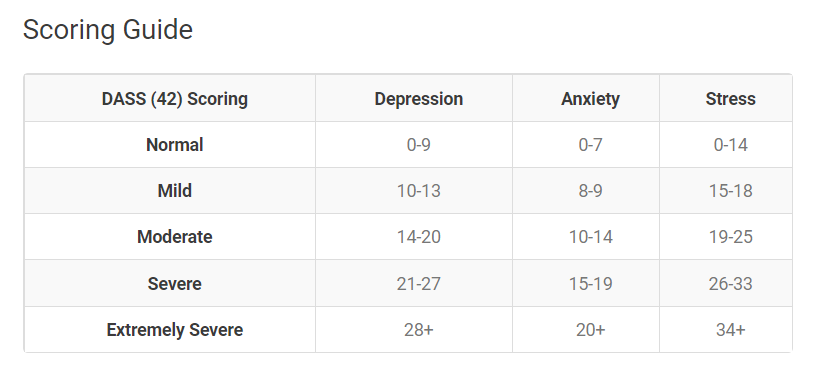

# 2. 데이터 준비 

# 2.1 Feature engineering +EDA... etc

In [ ]:
#major 지우고 (범주형 오버),상관 없는 피쳐 지우고, 각 타겟에 맞는 특성 피쳐
#depression으로 모델 일단 구축 
dfd= df[['Q3A','Q5A','Q10A','Q13A','Q16A','Q17A','Q21A','Q24A','Q26A','Q31A','Q34A','Q37A','Q38A','Q42A',
         'TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10',
         'education','urban','gender','engnat','age','hand','religion','orientation','race','voted','married','familysize']]
#dfa= df[['Q2A','Q4A','Q7A','Q9A','Q12A','Q15A','Q19A','Q20A','Q23A','Q25A','Q28A','Q30A','Q36A','Q40A','Q41A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]
#dfs= df[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]

#VCL 단어 표현력 테스트 합계  #() !이고 숫자 앞에는 =하나만 쓰나봐 
#if 'VCL6' 'VCL9' 'VCL12' 중에 하나라도 1이면 그 데이터 지워라 > 이건 어떻게할지 계속 고민하겠어  
dfd1=df.loc[(df['VCL6'] !=1)&(df['VCL9'] !=1)]
dfd=dfd1.loc[df['VCL12'] !=1]

dfd['VCL']=df['VCL1']+df['VCL2']+df['VCL3']+df['VCL4']+df['VCL5']+df['VCL7']+df['VCL8']+df['VCL10']+df['VCL11']+df['VCL13']+df['VCL14']+df['VCL15']+df['VCL16']
#dfa['VCL']=df['VCL1']+df['VCL2']+df['VCL3']+df['VCL4']+df['VCL5']+df['VCL7']+df['VCL8']+df['VCL10']+df['VCL11']+df['VCL13']+df['VCL14']+df['VCL15']+df['VCL16']
#dfs['VCL']=df['VCL1']+df['VCL2']+df['VCL3']+df['VCL4']+df['VCL5']+df['VCL7']+df['VCL8']+df['VCL10']+df['VCL11']+df['VCL13']+df['VCL14']+df['VCL15']+df['VCL16']

#depression_target 설정 
dfd['d_score']=df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+df['Q26A']+df['Q31A']+df['Q34A']+df['Q38A']+df['Q42A']
dfd.head(20)
#dfd['d_score']>=21
dfd= dfd[['d_score','VCL','TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10',
         'education','urban','gender','engnat','age','hand','religion','orientation','race','voted','married','familysize','screensize']]
dfd

In [ ]:
dfd[['VCL','d_score']].groupby(['VCL'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
#!
dfd[['education','d_score']].groupby(['education'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
dfd[['urban','d_score']].groupby(['urban'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
#!!!
dfd[['TIPI2','d_score']].groupby(['TIPI2'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
#!!! de
dfd[['TIPI3','d_score']].groupby(['TIPI3'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
#!!!
dfd[['TIPI4','d_score']].groupby(['TIPI4'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
dfd[['age','d_score']].groupby(['age'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
dfd[['race','d_score']].groupby(['race'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
#kaggle task NOPE  xx
dfd[['screensize','d_score']].groupby(['screensize'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
dfd=dfd.loc[(dfd['age']>0)&(dfd['age']<90)]

In [ ]:
g = sns.FacetGrid(dfd, col='d_score')
g.map(plt.hist, 'age', bins=20)

In [ ]:
dfd[['age','d_score']].groupby(['age'],as_index=False).mean().sort_values(by='d_score',ascending=False)

In [ ]:
dfd['AgeBand'] = pd.cut(dfd['age'], 4)
dfd[['AgeBand','d_score']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
dfd['AgeBand']=0
dfd.loc[(dfd['age']>12) & (dfd['age']<= 32),'AgeBand'] = 3
dfd.loc[(dfd['age']>32) & (dfd['age']<= 51),'AgeBand'] = 2
dfd.loc[(dfd['age']>51) & (dfd['age']<= 70),'AgeBand'] = 1
dfd.loc[dfd['age']>70,'AgeBand']=0
dfd.head()

In [ ]:
#personality 점수 높을수록 우울 업업
dfd['personality']=dfd['TIPI2']+dfd['TIPI4']+dfd['TIPI6']+dfd['TIPI8']+dfd['TIPI10']-dfd['TIPI1']-dfd['TIPI3']-dfd['TIPI5']-dfd['TIPI7']-dfd['TIPI9']

# target 설정 

In [ ]:
#target은'd_score'
#dfd['d_score']>=21
dfd['d_severe']=0
dfd.loc[(dfd['d_score']<=9),'d_severe']=0
dfd.loc[(dfd['d_score']<=13)&(dfd['d_score']>=10),'d_severe']=1
dfd.loc[(dfd['d_score']<=20)&(dfd['d_score']>=14),'d_severe']=2
dfd.loc[(dfd['d_score']<=21)&(dfd['d_score']>=27),'d_severe']=3
dfd.loc[(dfd['d_score']>=28),'d_severe']=4
dfd.head()

In [ ]:
dfd.d_severe.value_counts().to_frame().style.background_gradient(cmap='summer')

In [ ]:
dfd= dfd[['d_severe','AgeBand','VCL','personality','screensize',
         'education','urban','gender','engnat','age','hand','religion','orientation','race','voted','married','familysize']]
dfd

# baseline

In [ ]:
#from sklearn import datasets, linear_model
#from sklearn.model_selection import train_test_split

train=dfd.sample(frac=0.75,random_state=1)
test=dfd.drop(train.index)
train.head()

In [ ]:
len(train),len(test)

In [ ]:
train['d_severe'].mean()

In [ ]:
# 한셀식 하자 !!!!!!!!!!!! 분해할 수 있잖아 

In [ ]:
#label 정의 
target='d_severe'
y_train=train[target]
y_test=test[target]

In [ ]:
#dscore mean으로 예측 (기준모델)
predict=y_train.mean()
predict

In [ ]:
#기준모델로 훈련 에러 (MAE 계산)#나중에뜯어보기
from sklearn.metrics import mean_absolute_error
y_pred=[predict]*len(y_train)
mae=mean_absolute_error(y_train,y_pred)
print(f'훈련에러:{mae:.2f}')


In [ ]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

In [ ]:
#(predict,)*len(y_train) #튜플과 리스트의 차이 

# 2. 1  데이터 분할 :Train / Test Split 

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

# 3. Modeling 

(1) Y 값이 연속된 숫자 : Regression / Y 값이 숫자 X : Classifier
분류로 간다!!! 점수 분류된 그 표로 간다..!


In [ ]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#다중 선형 회귀 그래프로 확인 
from matplotlib import style
import matplotlib.pyplot as plt
style.use('seaborn-talk')
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(train['personality'],train['age'],train['d_severe'])
ax.set_xlabel('personality', labelpad=12)
ax.set_ylabel('age', labelpad=10)
ax.set_zlabel('d_severe', labelpad=20)
plt.suptitle('Depression linear',fontsize=20)
plt.show


In [ ]:
#다중모델 학습 특성
X_train=train[features]
X_test[features]
#fit
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
mae=mean_absolute_error(y_train,y_pred)
print(f'훈련에러:{mae:2f}')
#test
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
print(f'테스트 에러:{mae:2f}')
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))


In [ ]:
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

#데이터 누수가 일어나지 않았습니다.
#왜냐하면, 검증 데이터 잘 분리했고, 시간에 따라 영향받는 특성이 없으며
#성능이 그리 좋지 않기 때문..(별)입니다. 

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(min_samples_leaf=10, n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

In [ ]:
import matplotlib.pyplot as plt

# 특성 중요도(onehot)
rf = pipe.named_steps['randomforestclassifier']
colnames = pipe.named_steps['onehotencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with onehotencoder')
importances.sort_values()[-n:].plot.barh();

In [ ]:
dfd= dfd[['d_severe','AgeBand','VCL','personality','education','urban','age','religion','orientation','familysize']]
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(min_samples_leaf=10,max_depth =10, random_state=10, oob_score=True)
)

k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['1','2','3','4']
print(classification_report(X_val, y_val,target_names=target_names))

In [ ]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

In [ ]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm 

LR = LogisticRegression(max_iter=1000,C=0.175,random_state=42)
LR.fit(X_train,y_train)
lr_training_accuracy = LR.score(X_train, y_train)
lr_predictions = LR.predict(X_test)
lr_predictions = [int(x) for x in lr_predictions]

xgboost = XGBRegressor(learning_rate=0.005,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

xgb = xgboost.fit(X_train,y_train)
xgb_training_accuracy = xgb.score(X_train,y_train)
xgb_predictions = xgb.predict(X_test)
xgb_predictions = [round(x) for x in xgb_predictions]

print("Logistic Regression training accuracy: %.2f%%" % (lr_training_accuracy * 100.0))
print("\nXGB training accuracy: %.2f%%" % (xgb_training_accuracy * 100.0))

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

In [ ]:
#features
dfd= df[['Q3A','Q5A','Q10A','Q13A','Q16A','Q17A','Q21A','Q24A','Q26A','Q31A','Q34A','Q37A','Q38A','Q42A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]
dfa= df[['Q2A','Q4A','Q7A','Q9A','Q12A','Q15A','Q19A','Q20A','Q23A','Q25A','Q28A','Q30A','Q36A','Q40A','Q41A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]
dfs= df[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]

#점수 내기 
d=df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+df['Q26A']+df['Q31A']+df['Q37A']+df['Q38A']+df['Q42A']
a=df['Q2A']+df['Q4A']+df['Q7A']+df['Q9A']+df['Q12A']+df['Q15A']+df['Q19A']+df['Q20A']+df['Q23A']+df['Q25A']+df['Q28A']+df['Q30A']+df['Q36A']+df['Q40A']+df['Q41A']
s=df['Q1A']+df['Q6A']+df['Q8A']+df['Q11A']+df['Q12A']+df['Q14A']+df['Q18A']+df['Q22A']+df['Q27A']+df['Q29A']+df['Q32A']+df['Q33A']+df['Q35A']+df['Q39A']

